# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies, API key
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key

# API url config
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Generate Cities List

In [2]:
# Create blank list of longitudes, latitudes, and cities.
lat = []
lng = []
cities = []

# Populate lat and lng lists with appropriate, randomly generated values
# 1500 values are generated to guarantee a sample size of 500+ cities
# -90 to 90 for lat, -180 to 180 for lng
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Find cities using lat and lng generated above
for x in range(1500):
    city = citipy.nearest_city(lat[x], lng[x]).city_name
    
    # Only append cities that are not already in cities list
    if city not in cities:
        cities.append(city)

# Print length of cities list to confirm that it has over 500 cities
len(cities) 

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create city query url template
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create blank list for required data
weather_data = []

# Create count variable to keep track of how many iterations the loop
# has been through
i = 0

# Loop through all cities and populate above list with information for each 
# city
for city in cities:
    i += 1
    city_data = requests.get(query_url + city).json()
    
    try:
        # Get required data points
        lat = city_data["coord"]["lat"]
        lng = city_data["coord"]["lon"]
        maxtemp = city_data["main"]["temp_max"]
        humidity = city_data["main"]["humidity"]
        cloudiness = city_data["clouds"]["all"]
        wind_speed = city_data["wind"]["speed"]
        country = city_data["sys"]["country"]
        date = city_data["dt"]
        
        # Append data to previously created weather_data list
        weather_data.append([city, lat, lng, maxtemp, humidity, cloudiness, wind_speed, country, date])
        
        # Confirm that city weather data has been appended to list
        print(f"Finding city {i} | {city}")
        
    except:
        print("City not found.")

Finding city 1 | rikitea
Finding city 2 | norman wells
Finding city 3 | atuona
Finding city 4 | pitkyaranta
Finding city 5 | mataura
Finding city 6 | upernavik
Finding city 7 | ushuaia
Finding city 8 | pisco
Finding city 9 | port alfred
Finding city 10 | choix
Finding city 11 | hobart
Finding city 12 | komsomolskiy
Finding city 13 | albany
Finding city 14 | butaritari
Finding city 15 | hasaki
Finding city 16 | placido de castro
Finding city 17 | mayo
Finding city 18 | dingle
Finding city 19 | kapaa
Finding city 20 | vila franca do campo
Finding city 21 | isangel
Finding city 22 | prainha
Finding city 23 | cabo san lucas
Finding city 24 | tessalit
Finding city 25 | pacific grove
Finding city 26 | sabana grande de boya
Finding city 27 | harper
Finding city 28 | cape town
Finding city 29 | busselton
Finding city 30 | korla
Finding city 31 | port lincoln
Finding city 32 | tuatapere
Finding city 33 | dikson
Finding city 34 | quatre cocos
Finding city 35 | bethel
City not found.
Finding city

Finding city 304 | tabas
Finding city 305 | arlit
Finding city 306 | waipawa
Finding city 307 | chicama
Finding city 308 | nicoya
City not found.
Finding city 310 | aswan
Finding city 311 | yulara
Finding city 312 | tchibanga
Finding city 313 | anloga
Finding city 314 | nadym
Finding city 315 | hamilton
City not found.
Finding city 317 | fougeres
Finding city 318 | vila do maio
Finding city 319 | washougal
Finding city 320 | saldanha
Finding city 321 | dyurtyuli
Finding city 322 | kholodnyy
Finding city 323 | jumla
Finding city 324 | qandala
Finding city 325 | beaupre
Finding city 326 | flinders
Finding city 327 | bonthe
Finding city 328 | ambunti
Finding city 329 | dabola
Finding city 330 | abonnema
Finding city 331 | norrtalje
Finding city 332 | krutinka
Finding city 333 | aurad
Finding city 334 | marshall
Finding city 335 | mombetsu
Finding city 336 | umm kaddadah
Finding city 337 | bathsheba
Finding city 338 | vardo
Finding city 339 | middle island
Finding city 340 | zhezkazgan
Fin

Finding city 607 | jizan
Finding city 608 | sainte-luce
Finding city 609 | dauphin


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Create dataframe
city_data_df = pd.DataFrame(weather_data, columns=["City", "Latitude", "Longitude", "Max. Temp (F)", "Humidity (%)", 
                                                   "Cloudiness (%)", "Wind Speed (MPH)", "Country", "Date"])

# Display dataframe
city_data_df.head()

City  Latitude  Longitude  Max. Temp (F)  Humidity (%)  \
0       rikitea  -23.1203  -134.9692          73.54            74   
1  norman wells   65.2820  -126.8329          60.84            63   
2        atuona   -9.8000  -139.0333          77.52            70   
3   pitkyaranta   61.5734    31.4792          63.52            81   
4       mataura  -46.1927   168.8643          42.48            98   

   Cloudiness (%)  Wind Speed (MPH) Country        Date  
0              36             17.83      PF  1627323638  
1              75             11.50      CA  1627323638  
2              55             25.08      PF  1627323638  
3              55              3.31      RU  1627323639  
4              91              2.95      NZ  1627323114

In [22]:
# Creates "output" folder, converts df to csv, and places new csv in 
# output folder
city_data_df.to_csv("Output/city_weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
city_data_df[["Latitude", "Longitude", "Max. Temp (F)", "Humidity (%)", 
              "Cloudiness (%)", "Wind Speed (MPH)", "Country", "Date"]].describe()

# Df shows no cities with humidity over 100%. 

Latitude   Longitude  Max. Temp (F)  Humidity (%)  Cloudiness (%)  \
count  557.000000  557.000000     557.000000    557.000000      557.000000   
mean    19.299907   21.486599      71.628187     68.052065       54.707361   
std     33.035903   91.405856      14.810120     21.598090       37.013980   
min    -54.800000 -175.200000      35.620000      5.000000        0.000000   
25%     -7.470600  -59.516700      60.530000     56.000000       20.000000   
50%     21.444700   27.233300      73.800000     72.000000       62.000000   
75%     46.616600  102.500000      82.330000     84.000000       90.000000   
max     78.218600  179.316700     114.190000    100.000000      100.000000   

       Wind Speed (MPH)          Date  
count        557.000000  5.570000e+02  
mean           8.210952  1.627324e+09  
std            5.580634  9.203496e+01  
min            0.000000  1.627323e+09  
25%            4.050000  1.627324e+09  
50%            6.910000  1.627324e+09  
75%           10.870000  1.627324e+09  
max           32.730000  1.627324e+09

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (7/26/21)')

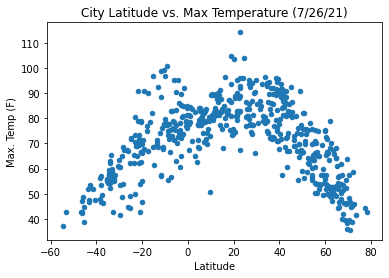

In [20]:
city_data_df.plot.scatter(x="Latitude", y="Max. Temp (F)")
plt.title("City Latitude vs. Max Temperature (7/26/21)")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (7/26/21)')

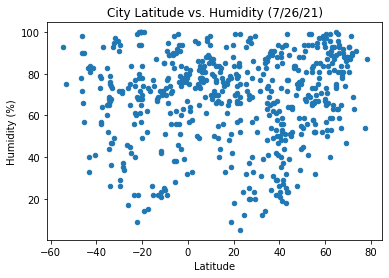

In [25]:
city_data_df.plot.scatter(x="Latitude", y="Humidity (%)")
plt.title("City Latitude vs. Humidity (7/26/21)")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (7/26/21)')

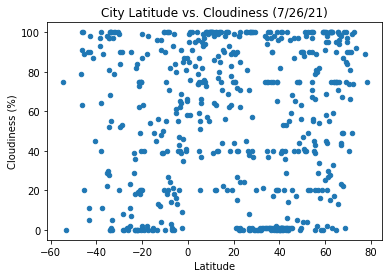

In [26]:
city_data_df.plot.scatter(x="Latitude", y="Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (7/26/21)")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (7/26/21)')

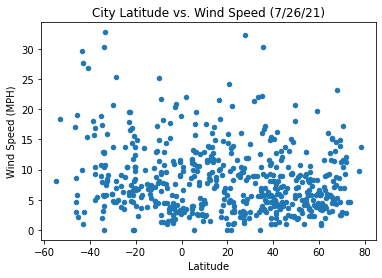

In [27]:
city_data_df.plot.scatter(x="Latitude", y="Wind Speed (MPH)")
plt.title("City Latitude vs. Wind Speed (7/26/21)")


## Linear Regression

In [30]:
# Separate df into northern/southern hemisphere
north_df = city_data_df.loc[city_data_df["Latitude"] > 0]
south_df = city_data_df.loc[city_data_df["Latitude"] < 0]

City  Latitude  Longitude  Max. Temp (F)  Humidity (%)  \
1     norman wells   65.2820  -126.8329          60.84            63   
3      pitkyaranta   61.5734    31.4792          63.52            81   
5        upernavik   72.7868   -56.1549          45.81            63   
9            choix   26.7092  -108.3219          93.81            37   
11    komsomolskiy   40.4272    71.7189          90.32            23   
..             ...       ...        ...            ...           ...   
552  balakhninskiy   58.0106   114.2769          57.61            71   
553        katakwi    1.8911    33.9661          71.15            58   
554          jizan   17.3333    42.6667          83.34            65   
555    sainte-luce   14.4673   -60.9271          87.75            66   
556        dauphin   51.1494  -100.0502          69.94            68   

     Cloudiness (%)  Wind Speed (MPH) Country        Date  
1                75             11.50      CA  1627323638  
3                55              3.31      RU  1627323639  
5               100              4.59      GL  1627323639  
9                71              4.72      MX  1627323640  
11                0              4.61      UZ  1627323496  
..              ...               ...     ...         ...  
552               0              4.18      RU  1627323812  
553             100              3.51      UG  1627323813  
554             100              2.08      SA  1627323813  
555              75             14.97      MQ  1627323813  
556              40              3.44      CA  1627323546  

[379 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4389136902767686


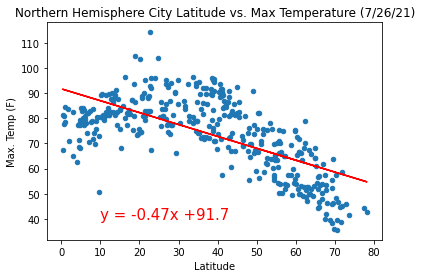

In [54]:
north_df.plot.scatter(x="Latitude", y="Max. Temp (F)")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (7/26/21)")

# Regression
# The following few lines are copy/pasted to every other plot below

# Assign x and y values to be used; find slope, intercept, rvalue, pvalue and st. dev
x_values = north_df["Latitude"]
y_values = north_df["Max. Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Find regression values, regression equation, and display r^2
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5793504722530528


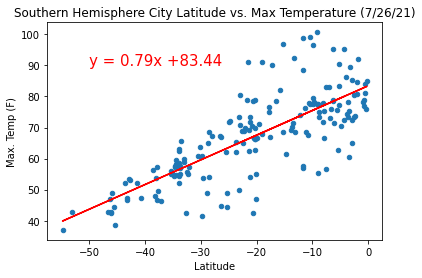

In [56]:
south_df.plot.scatter(x="Latitude", y="Max. Temp (F)")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (7/26/21)")
# Regression
x_values = south_df["Latitude"]
y_values = south_df["Max. Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010773473626156977


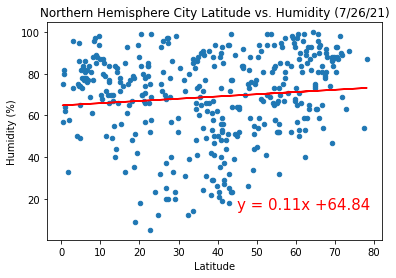

In [59]:
north_df.plot.scatter(x="Latitude", y="Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs. Humidity (7/26/21)")

# Regression
x_values = north_df["Latitude"]
y_values = north_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 7.405955556719338e-05


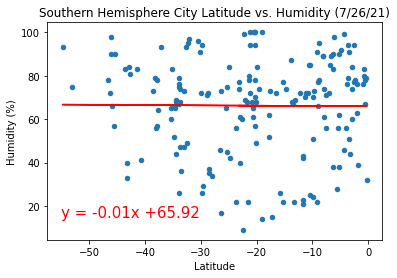

In [64]:
south_df.plot.scatter(x="Latitude", y="Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs. Humidity (7/26/21)")

# Regression
x_values = south_df["Latitude"]
y_values = south_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008901894237876391


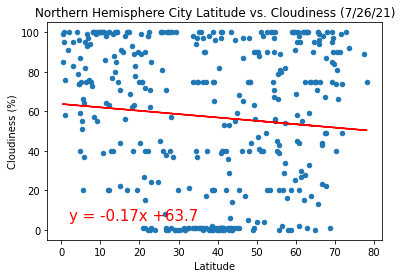

In [67]:
north_df.plot.scatter(x="Latitude", y="Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (7/26/21)")

# Regression
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013746575151318472


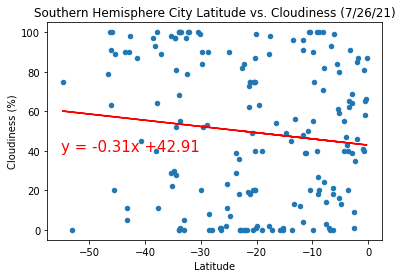

In [69]:
south_df.plot.scatter(x="Latitude", y="Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (7/26/21)")

# Regression
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011926263984259184


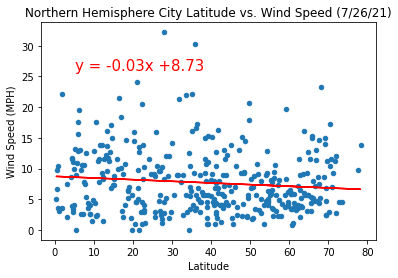

In [72]:
north_df.plot.scatter(x="Latitude", y="Wind Speed (MPH)")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (7/26/21)")

# Regression
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,26),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04889590094852978


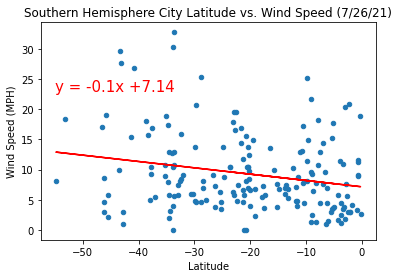

In [74]:
south_df.plot.scatter(x="Latitude", y="Wind Speed (MPH)")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (7/26/21)")

# Regression
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")